# 데이터셋 선정

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

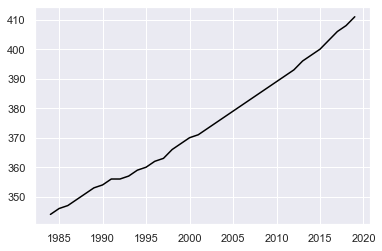

In [2]:
co2 = pd.read_csv("co2_annual_new.csv")
plt.plot(co2['year'], co2['co2_global'], color = 'black')

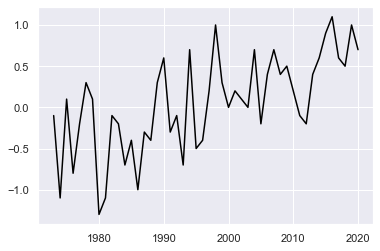

In [3]:
#평균기온 편차
tempy = pd.read_csv("meteo_temp_y_new_domestic.csv")
plt.plot(tempy['year'], tempy['temp'], color = 'black')

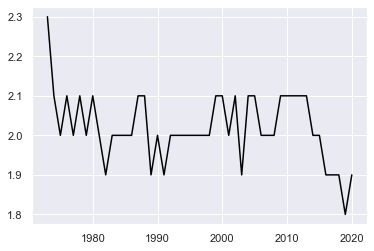

In [4]:
#평균 풍속 연평균
ws = pd.read_csv("ws_y_avg_new.csv")
plt.plot(ws['year'], ws['wind_speed'], color = 'black')

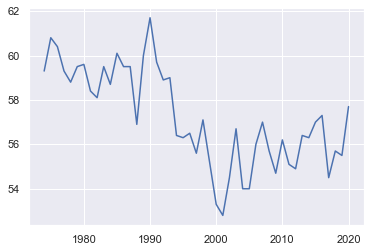

In [5]:
#연평균 실효습도
firey = pd.read_csv("ehfire_y_avg.csv")
plt.plot(firey['year'], firey['effective_humidity'])

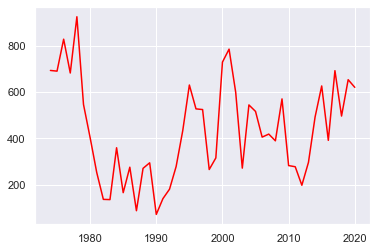

In [6]:
#산불발생 건수
plt.plot(firey['year'], firey['outbreak_cases'], color = 'red')

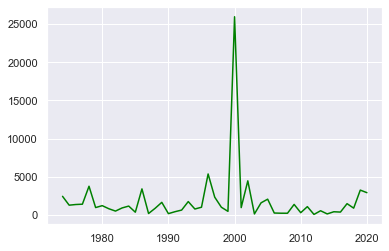

In [7]:
#산불피해 면적
plt.plot(firey['year'], firey['damaged_area'], color = 'green')

In [8]:
data1 = pd.merge(co2, tempy)

In [9]:
data2 = pd.merge(data1, ws)

In [10]:
air = pd.merge(data2, firey)
air

,year,co2_global,temp,wind_speed,effective_humidity,outbreak_cases,damaged_area
0,1984,344,-0.7,2.0,58.7,359,1164
1,1985,346,-0.4,2.0,60.1,165,363
2,1986,347,-1.0,2.0,59.5,275,3414
3,1987,349,-0.3,2.1,59.5,87,191
4,1988,351,-0.4,2.1,56.9,270,878
5,1989,353,0.3,1.9,60.0,294,1652
6,1990,354,0.6,2.0,61.7,71,175
7,1991,356,-0.3,1.9,59.7,139,429
8,1992,356,-0.1,2.0,58.9,180,640
9,1993,357,-0.7,2.0,59.0,278,1752


# 선형회귀모델 - 산불발생빈도

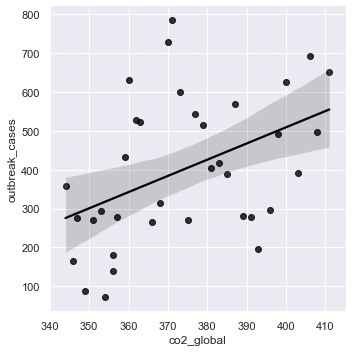

In [11]:
sns.lmplot(x = "co2_global", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

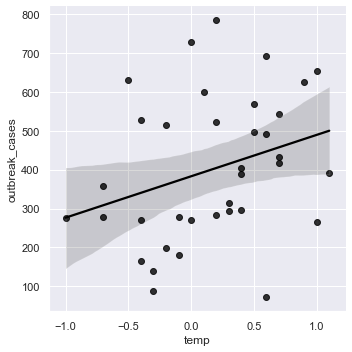

In [12]:
sns.lmplot(x = "temp", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

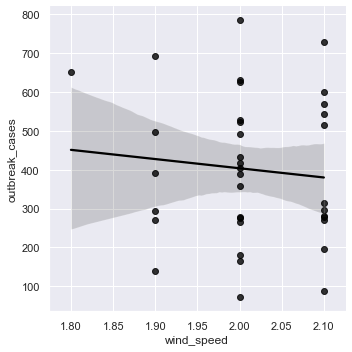

In [13]:
sns.lmplot(x = "wind_speed", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

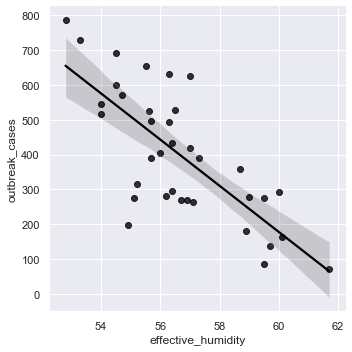

In [14]:
sns.lmplot(x = "effective_humidity", y = "outbreak_cases", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

이산화탄소 농도와 기온 편차는 산불 발생 빈도와 정비례하였고 풍속과 습도는 반비례하였다.

In [15]:
lm_data_air = smf.ols( "outbreak_cases ~ co2_global + temp + wind_speed + effective_humidity",
                       data=air).fit()
lm_data_air.params

Intercept             7917.461872
co2_global              -2.054879
temp                    23.908942
wind_speed            -949.429487
effective_humidity     -85.506804
dtype: float64

In [16]:
mod_whole = smf.ols("outbreak_cases ~ co2_global + temp + wind_speed + effective_humidity",data=air).fit()
resid_sq_whole = np.sum(mod_whole.resid ** 2)
resid_sq_whole

385838.19417868316

In [17]:
mod_not_co2 = smf.ols("outbreak_cases ~ temp + wind_speed + effective_humidity",data=air).fit()
resid_sq_not_co2 = np.sum(mod_not_co2.resid ** 2)
resid_sq_not_co2

408567.869637874

In [18]:
mod_not_change = smf.ols("outbreak_cases ~ co2_global + wind_speed + effective_humidity",data=air).fit()
resid_sq_not_change = np.sum(mod_not_change.resid ** 2)
resid_sq_not_change

388988.79955634044

In [19]:
mod_not_ws = smf.ols("outbreak_cases ~ co2_global + temp + effective_humidity",data=air).fit()
resid_sq_not_ws = np.sum(mod_not_ws.resid ** 2)
resid_sq_not_ws

527446.7433036137

In [20]:
mod_not_eff = smf.ols("outbreak_cases ~ co2_global + temp + wind_speed",data=air).fit()
resid_sq_not_eff = np.sum(mod_not_eff.resid ** 2)
resid_sq_not_eff

986469.5619607534

In [21]:
print(sm.stats.anova_lm(mod_whole, typ=2).round(3))

                        sum_sq    df       F  PR(>F)
co2_global           22729.675   1.0   1.826   0.186
temp                  3150.605   1.0   0.253   0.618
wind_speed          141608.549   1.0  11.377   0.002
effective_humidity  600631.368   1.0  48.257   0.000
Residual            385838.194  31.0     NaN     NaN


가장 많은 제곱합을 설명하는 요인은 실효습도, 평균 풍속, 이산화탄소 농도, 평균기온 편차순이다.

In [22]:
print("모든 변수를 포함한 모델：", mod_whole.aic.round(3))
print("이산화탄소 연평균 농도를 제외한 모델：", mod_not_co2.aic.round(3))
print("전지구 평균기온 편차를 제외한 모델：", mod_not_change.aic.round(3))
print("평균 풍속 연평균을 제외한 모델：", mod_not_ws.aic.round(3))
print("실효습도를 제외한 모델：", mod_not_eff.aic.round(3))

모든 변수를 포함한 모델： 446.231
이산화탄소 연평균 농도를 제외한 모델： 446.292
전지구 평균기온 편차를 제외한 모델： 444.524
평균 풍속 연평균을 제외한 모델： 455.486
실효습도를 제외한 모델： 478.025


In [23]:
null_model = smf.ols( "outbreak_cases ~ 1",  data=air).fit()
lm_model_1 = smf.ols( "outbreak_cases ~ effective_humidity",  data=air).fit()
lm_model_2 = smf.ols( "outbreak_cases ~ effective_humidity + wind_speed",  data=air).fit()
lm_model_3 = smf.ols( "outbreak_cases ~ effective_humidity + wind_speed + co2_global",  data=air).fit()
lm_model_4 = smf.ols( "outbreak_cases ~ effective_humidity + wind_speed + co2_global + temp",  data=air).fit()

In [24]:
print(null_model.rsquared, null_model.aic)
print(lm_model_1.rsquared, lm_model_1.aic)
print(lm_model_2.rsquared, lm_model_2.aic)
print(lm_model_3.rsquared, lm_model_3.aic)
print(lm_model_4.rsquared, lm_model_4.aic)

0.0 479.81054886515113
0.5574370226531333 452.46433875811994
0.6656445032460518 444.3707312072301
0.6823646616739598 444.52390246010003
0.6849373414174517 446.2311340882568


결정계수는 모델 1에서 크게 증가하고, AIC는 모델 2에서 가장 작다.

In [47]:
lm_data_air.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         outbreak_cases   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     16.85
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           1.95e-07
Time:                        19:48:25   Log-Likelihood:                -218.12
No. Observations:                  36   AIC:                             446.2
Df Residuals:                      31   BIC:                             454.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7917.4619   1455.926      5.438      0.000    4948.082    1.09e+04
co2_global            -2.0549      1.521     -1.351      0.186      -5.156       1.046
temp                  23.9089     47.521      0.503      0.618     -73.011     120.829
wind_speed          -949.4295    281.475     -3.373      0.002   -1523.501    -375.358
effective_humidity   -85.5068     12.309     -6.947      0.000    -110.611     -60.403
==============================================================================
Omnibus:                        1.152   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.337
Skew:                           0.047   Prob(JB):                        0.845
Kurtosis:                       3.465   Cond. No.                     3.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

유의미한 요인은 풍속과 실효습도이다.

In [26]:
sd = air.sample(n = 30, random_state = 1)
lm_model_2 = smf.ols( "outbreak_cases ~ wind_speed + effective_humidity",  data = sd).fit()
lm_model_2.params

Intercept             6172.037226
wind_speed            -721.956453
effective_humidity     -76.405333
dtype: float64

유의미한 독립변수는 풍속과 실효습도이다.

In [53]:
lm_data_air.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7917.4619,1455.926,5.438,0.000,4948.082,1.09e+04
co2_global,-2.0549,1.521,-1.351,0.186,-5.156,1.046
temp,23.9089,47.521,0.503,0.618,-73.011,120.829
wind_speed,-949.4295,281.475,-3.373,0.002,-1523.501,-375.358
effective_humidity,-85.5068,12.309,-6.947,0.000,-110.611,-60.403


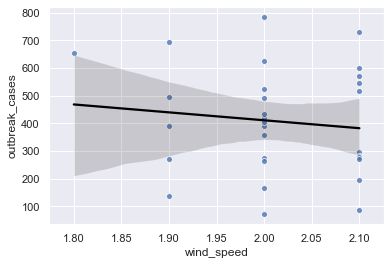

In [27]:
sns.regplot(x = "wind_speed", y = "outbreak_cases", data = sd,scatter_kws={'edgecolor':"white"},line_kws = {"color": "black"})

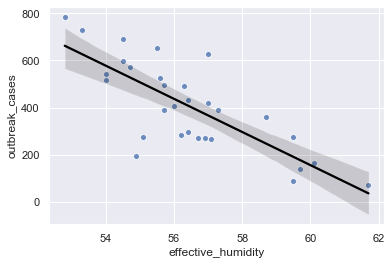

In [28]:
sns.regplot(x = "effective_humidity", y = "outbreak_cases", data = sd,scatter_kws={'edgecolor':"white"},line_kws = {"color": "black"})

산불 발생빈도는 풍속과 습도에 반비례하는 모습을 보였다.

# 선형회귀모델 - 산불 피해 면적

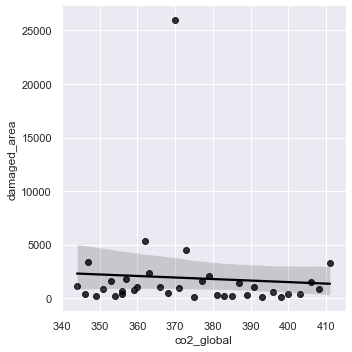

In [29]:
sns.lmplot(x = "co2_global", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

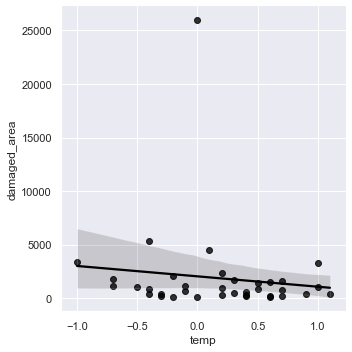

In [30]:
sns.lmplot(x = "temp", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

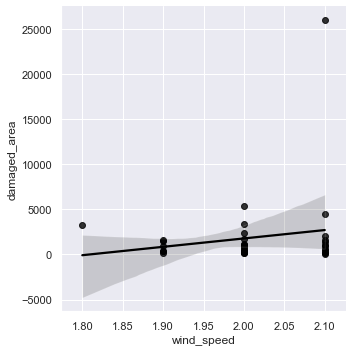

In [31]:
sns.lmplot(x = "wind_speed", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

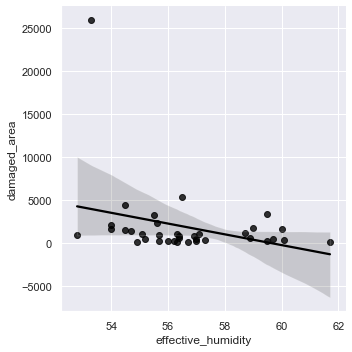

In [32]:
sns.lmplot(x = "effective_humidity", y = "damaged_area", data = air,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

In [33]:
lm_data_field = smf.ols( "damaged_area ~ co2_global + temp + wind_speed + effective_humidity",data=air).fit()
lm_data_field.params

Intercept             96388.023265
co2_global              -71.380333
temp                   -581.863372
wind_speed            -3306.732341
effective_humidity    -1078.264629
dtype: float64

In [34]:
mod_all = smf.ols( "damaged_area ~ co2_global + temp + wind_speed + effective_humidity",data=air).fit()
resid_sq_all = np.sum(mod_all.resid ** 2)
resid_sq_all

531735078.49483943

In [35]:
mod_non_carbondioxide = smf.ols( "damaged_area ~ temp + wind_speed + effective_humidity",
                       data=air).fit()
resid_sq_non_carbondioxide = np.sum(mod_non_carbondioxide.resid ** 2)
resid_sq_non_carbondioxide

559162048.8424118

In [36]:
mod_non_global = smf.ols( "damaged_area ~ co2_global + wind_speed + effective_humidity",
                       data=air).fit()
resid_sq_non_global = np.sum(mod_non_global.resid ** 2)
resid_sq_non_global

533601094.4051868

In [37]:
mod_non_wind = smf.ols( "damaged_area ~ co2_global + temp + effective_humidity",
                       data=air).fit()
resid_sq_non_wind = np.sum(mod_non_wind.resid ** 2)
resid_sq_non_wind

533452837.08111334

In [38]:
mod_non_eh = smf.ols( "damaged_area ~ co2_global + temp + wind_speed",
                       data=air).fit()
resid_sq_non_eh = np.sum(mod_non_eh.resid ** 2)
resid_sq_non_eh

627246956.2295054

In [39]:
print(sm.stats.anova_lm(mod_all, typ=2).round(3))

                          sum_sq    df      F  PR(>F)
co2_global          2.742697e+07   1.0  1.599   0.215
temp                1.866016e+06   1.0  0.109   0.744
wind_speed          1.717759e+06   1.0  0.100   0.754
effective_humidity  9.551188e+07   1.0  5.568   0.025
Residual            5.317351e+08  31.0    NaN     NaN


가장 많은 제곱합을 설명하는 요인은 실효습도, 이산화탄소 농도, 평균기온 편차, 평균 풍속순이다.

In [40]:
print("모든 변수를 포함한 모델：", mod_whole.aic.round(3))
print("이산화탄소 연평균 농도를 제외한 모델：", mod_not_co2.aic.round(3))
print("전지구 평균기온 편차를 제외한 모델：", mod_not_change.aic.round(3))
print("평균 풍속 연평균을 제외한 모델：", mod_not_ws.aic.round(3))
print("실효습도를 제외한 모델：", mod_not_eff.aic.round(3))

모든 변수를 포함한 모델： 446.231
이산화탄소 연평균 농도를 제외한 모델： 446.292
전지구 평균기온 편차를 제외한 모델： 444.524
평균 풍속 연평균을 제외한 모델： 455.486
실효습도를 제외한 모델： 478.025


In [41]:
base_model = smf.ols( "damaged_area ~ 1",  data=air).fit()
lm_model_5 = smf.ols( "damaged_area ~ effective_humidity",  data=air).fit()
lm_model_6 = smf.ols( "damaged_area ~ effective_humidity + co2_global",  data=air).fit()
lm_model_7 = smf.ols( "damaged_area ~ effective_humidity + co2_global + temp",  data=air).fit()
lm_model_8 = smf.ols( "damaged_area ~ effective_humidity + co2_global + temp + wind_speed",  data=air).fit()

In [42]:
print(base_model.rsquared, base_model.aic)
print(lm_model_5.rsquared, lm_model_5.aic)
print(lm_model_6.rsquared, lm_model_6.aic)
print(lm_model_7.rsquared, lm_model_7.aic)
print(lm_model_8.rsquared, lm_model_8.aic)

2.220446049250313e-16 705.6792165030477
0.09434213593251806 704.111844104399
0.17702687967170028 702.6652738833557
0.17914233545488434 704.5726165965633
0.1817855593790394 706.4565068251173


결정계수는 모델 5에서 크게 증가하고, AIC는 모델 6에서 가장 작다.

In [43]:
lm_data_field.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.639e+04,5.4e+04,1.783,0.084,-1.38e+04,2.07e+05
co2_global,-71.3803,56.449,-1.265,0.215,-186.509,43.748
temp,-581.8634,1764.128,-0.330,0.744,-4179.827,3016.100
wind_speed,-3306.7323,1.04e+04,-0.316,0.754,-2.46e+04,1.8e+04
effective_humidity,-1078.2646,456.945,-2.360,0.025,-2010.209,-146.320


유의미한 요인은 실효습도이다.

In [44]:
ds = air.sample(n = 30, random_state = 1)
lm_model_3 = smf.ols("damaged_area ~ co2_global + effective_humidity",data=ds).fit()
lm_model_3.params

Intercept             96967.782454
co2_global              -80.776157
effective_humidity    -1145.319805
dtype: float64

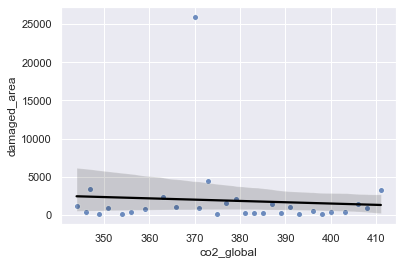

In [45]:
sns.regplot(x = "co2_global", y = "damaged_area", data = ds,scatter_kws={'edgecolor':"white"},line_kws = {"color": "black"})

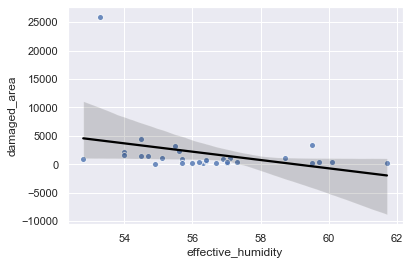

In [46]:
sns.regplot(x = "effective_humidity", y = "damaged_area", data = ds,scatter_kws={'edgecolor':"white"},line_kws = {"color": "black"})

습도와 산불 피해 면적은 반비례한다.

# 결론

데이터가 연도별로 측정되어 있고 국내 표본을 사용하여 수가 적다. 

또한 국내 산불은 주로 인위적인 요인으로 발생하는 경우가 많아 적용하기 힘들었다.

온실가스의 증가와 평균 기온 상승은 산불 발생에 큰 연관성을 가지고 있지 않다.

처음에 예상했던 것처럼 평균 풍속이 산불에 영향을 주는 것으로 나왔다.

그러나 예상과 달리 산불 발생 빈도에서 유의미했고 산불 피해 면적에는 그러지 않았다.

습도는 발생빈도와 피해면적에서 유의미한 요인으로 나와 산불 피해의 환경적 요인으로는 습도가 크게 영향을 주는 것을 알 수 있었다.